In [1]:
import pandas as pd
import numpy as np
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
print(star_wars.head(10))

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0    3292879998                                                Yes             
1    3292879538                                                 No             
2    3292765271                                                Yes             
3    3292763116                                                Yes             
4    3292731220                                                Yes             
5    3292719380                                                Yes             
6    3292684787                                                Yes             
7    3292663732                                                Yes             
8    3292654043                                                Yes             
9    3292640424                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

In [2]:
print (star_wars.columns)


Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [3]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [4]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [5]:
yes_no = {
    "Yes": True,
    "No": False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()


True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [7]:
seen_yes_no = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False
}

for c in star_wars.columns[3:9]:
    star_wars[c]=star_wars[c].map(seen_yes_no)

In [8]:
newnames = {"Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",'Unnamed: 4':'seen_2','Unnamed: 5':'seen_3','Unnamed: 6':'seen_4','Unnamed: 7':'seen_5','Unnamed: 8':'seen_6'}

star_wars = star_wars.rename(columns=newnames)


In [9]:
for c in star_wars.columns[3:9]:
    print(star_wars[c].value_counts())

True     673
False    513
Name: seen_1, dtype: int64
False    615
True     571
Name: seen_2, dtype: int64
False    636
True     550
Name: seen_3, dtype: int64
True     607
False    579
Name: seen_4, dtype: int64
True     758
False    428
Name: seen_5, dtype: int64
True     738
False    448
Name: seen_6, dtype: int64


In [10]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [11]:
othernames ={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1','Unnamed: 10':'ranking_2','Unnamed: 11':'ranking_3','Unnamed: 12':'ranking_4','Unnamed: 13':'ranking_5','Unnamed: 14':'ranking_6'}

star_wars = star_wars.rename(columns=othernames)

In [12]:
for c in star_wars.columns[9:15]:
    print(star_wars[c].value_counts())

4.0    237
6.0    168
3.0    130
1.0    129
5.0    100
2.0     71
Name: ranking_1, dtype: int64
5.0    300
4.0    183
2.0    116
3.0    103
6.0    102
1.0     32
Name: ranking_2, dtype: int64
6.0    217
5.0    203
4.0    182
3.0    150
2.0     47
1.0     36
Name: ranking_3, dtype: int64
1.0    204
6.0    161
2.0    135
4.0    130
3.0    127
5.0     79
Name: ranking_4, dtype: int64
1.0    289
2.0    235
5.0    118
3.0    106
4.0     47
6.0     41
Name: ranking_5, dtype: int64
2.0    232
3.0    220
1.0    146
6.0    145
4.0     57
5.0     36
Name: ranking_6, dtype: int64


In [13]:
rankings={}
d=1
for c in star_wars.columns[9:15]:
    rankings[d]=(star_wars[c].mean())
    print('Star Wars',d,'tiene un average de: ', round(star_wars[c].mean(),2))
    d +=1

Star Wars 1 tiene un average de:  3.73
Star Wars 2 tiene un average de:  4.09
Star Wars 3 tiene un average de:  4.34
Star Wars 4 tiene un average de:  3.27
Star Wars 5 tiene un average de:  2.51
Star Wars 6 tiene un average de:  3.05


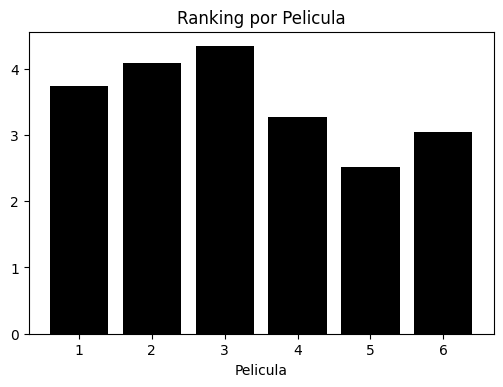

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

use = list(rankings.keys())
use_num = list(rankings.values())

plt.xlabel('Pelicula')
plt.title('Ranking por Pelicula')

plt.bar(range(len(use_num)), use_num, color='black', tick_label=use)

plt.show()


# Rankings

So far, we've cleaned up the data, renamed several columns, and computed the average ranking of each movie. 

In [15]:
seens={}
d=1
for c in star_wars.columns[3:9]:
    seens[d]=(star_wars[c].sum())
    print('Star Wars',d,'La han visto: ', round(star_wars[c].sum(),2))
    d +=1

Star Wars 1 La han visto:  673
Star Wars 2 La han visto:  571
Star Wars 3 La han visto:  550
Star Wars 4 La han visto:  607
Star Wars 5 La han visto:  758
Star Wars 6 La han visto:  738


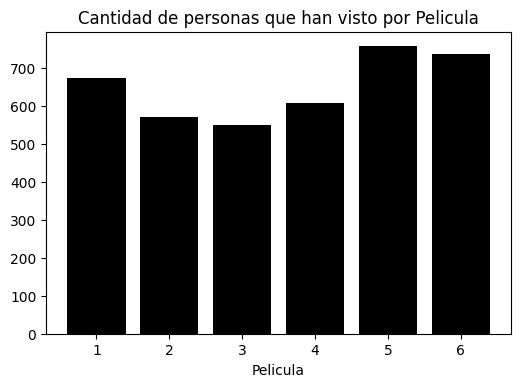

In [16]:
use2 = list(seens.keys())
use_num2 = list(seens.values())


plt.xlabel('Pelicula')
plt.title('Cantidad de personas que han visto por Pelicula')

plt.bar(range(len(use_num2)), use_num2, color='black', tick_label=use2)

plt.show()

# View counts


The original movies have higher watches than the newer movies. It could influence the rankings previously analyzed. 

In [17]:
male = star_wars[star_wars["Gender"] == "Male"]
female = star_wars[star_wars["Gender"] == "Female"]

In [18]:
rankingsmale={}
d=1
for c in male.columns[9:15]:
    rankingsmale[d]=(male[c].mean())
    d +=1

seensmale={}
d=1
for c in male.columns[3:9]:
    seensmale[d]=(male[c].sum())
    d +=1

In [19]:
rankingsfemale={}
d=1
for c in female.columns[9:15]:
    rankingsfemale[d]=(female[c].mean())
    d +=1

seensfemale={}
d=1
for c in female.columns[3:9]:
    seensfemale[d]=(female[c].sum())
    d +=1

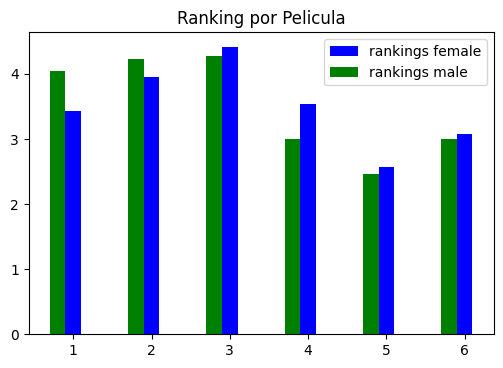

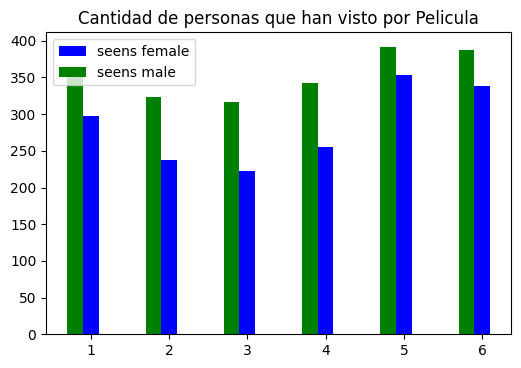

In [20]:
X = np.arange(len(rankingsfemale))
ax = plt.subplot(111)
ax.bar(X, rankingsfemale.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, rankingsmale.values(), width=0.2, color='g', align='center')
ax.legend(('rankings female','rankings male'))
plt.xticks(X, rankingsfemale.keys())
plt.title('Ranking por Pelicula')
plt.show()


X = np.arange(len(seensfemale))
ax = plt.subplot(111)
ax.bar(X, seensfemale.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, seensmale.values(), width=0.2, color='g', align='center')
ax.legend(('seens female','seens male'))
plt.xticks(X, seensfemale.keys())
plt.title('Cantidad de personas que han visto por Pelicula')
plt.show()

# Male/Female differences in favorite Star Wars movie and most seen movie

Definetively the movies attract more male vs female viewership, but there is not that much difference in ratings, except that females seem to like more the newer movies. 


In [24]:
trekkies = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
warsies = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]

In [25]:
rankingstrek={}
d=1
for c in trekkies.columns[9:15]:
    rankingstrek[d]=(trekkies[c].mean())
    d +=1

seenstrek={}
d=1
for c in trekkies.columns[3:9]:
    seenstrek[d]=(trekkies[c].sum())
    d +=1
    
    
rankingswars={}
d=1
for c in warsies.columns[9:15]:
    rankingswars[d]=(warsies[c].mean())
    d +=1

seenswars={}
d=1
for c in warsies.columns[3:9]:
    seenswars[d]=(warsies[c].sum())
    d +=1    

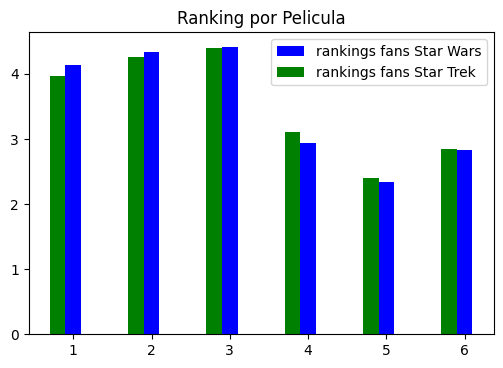

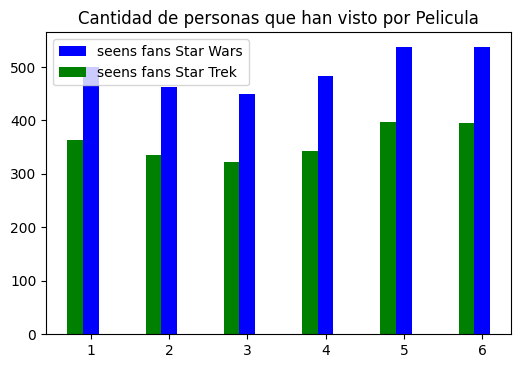

In [26]:
X = np.arange(len(rankingswars))
ax = plt.subplot(111)
ax.bar(X, rankingswars.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, rankingstrek.values(), width=0.2, color='g', align='center')
ax.legend(('rankings fans Star Wars','rankings fans Star Trek'))
plt.xticks(X, rankingswars.keys())
plt.title('Ranking por Pelicula')
plt.show()


X = np.arange(len(seenswars))
ax = plt.subplot(111)
ax.bar(X, seenswars.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, seenstrek.values(), width=0.2, color='g', align='center')
ax.legend(('seens fans Star Wars','seens fans Star Trek'))
plt.xticks(X, seenswars.keys())
plt.title('Cantidad de personas que han visto por Pelicula')
plt.show()

# Fans of Star Trek vs Fans of Star Wards differences in favorite Star Wars movie and most seen movie

Definetively the movies attract more Star Wars fans as expected vs Star Trek fans , but there is no significant difference in ratings. 

In [27]:
star_wars['Which character shot first?'].value_counts()

Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64

In [29]:
which = star_wars[star_wars["Which character shot first?"].isin(["Han", "Greedo"])]

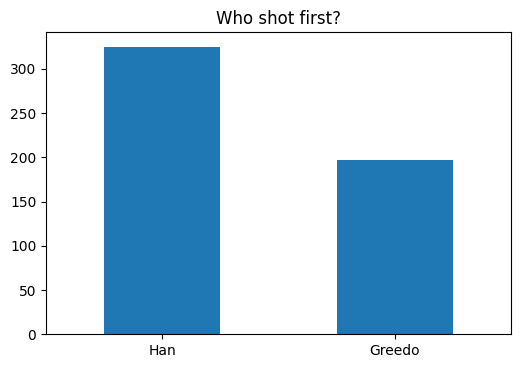

In [36]:
which["Which character shot first?"].value_counts().plot.bar(x=' ', y=' ', title = 'Who shot first?', rot=0)

# Who shot first?

It seems that Han shot first, given the majority of answers on those that answered the question. 